聚类算法
===

# 1.概述
## 1.1.聚类算法概述
- 层次聚类法：唯一分类
- KMeans算法：唯一分类
- 密度聚类法：唯一分类
- 普聚类：唯一分类
- GMM：混合高斯模型，分类后，还可以返回分到这个类的概率
- LDA

## 1.2.聚类的定义
聚类就是对大量未知标注的数据集，按数据的内在相似性将数据集划分为多个类别，使类别内的数据相似性较大而类别间的数据相似度较小

## 1.3.相似度/距离计算方法总结
- 闵可夫斯基距离Minkowski距离，参见KNN算法
- 杰拉德相似系数(Jaccard)：$J(A,B)=\frac{|A\cap B|}{|A\cup B|}$
- 余弦相似度(consine similarity):$cos(\theta)=\frac{\alpha^Tb}{|\alpha| \bullet |b|}$
- Pearson相似系数:$\rho_{XY}=\frac{cov(X,Y)}{\sigma_X\sigma_Y}=\frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y}=\frac{\sum_{i=1}^n(X_i-\mu_X)(Y_i-\mu_Y)}{\sqrt{\sum_{i=1}^n(X_i-\mu_X)^2}\sqrt{\sum_{i=1}^n(Y_i-\mu_Y)^2}}$
- 相对熵(K-L距离):$D(p||q)=\sum_xp(x)log\frac{p)(x)}{q(x)}=E_{p(x)}log\frac{p(x)}{q(x)}$
- Hellinger距离:$D_{\alpha}(p||q)=\frac{2}{1-\alpha^2}[1-\int p(x)^{\frac{1+\alpha}{2}}q(x)^{\frac{1-\alpha}{2}}dx]$

## 1.4.聚类的衡量指标
- 均一性：一个簇只包含一个类别的样本，则满足均一性
$$
h=\begin{cases}
1 & H(C)=0\\\\
1-\frac{H(C|K)}{H(C)} & otherwise
\end{cases}
$$
- 完整性：同样类别的样本被归类到相同的簇中，则满足完整性
$$
c=\begin{cases}
1 & H(K)=0\\\\
1-\frac{H(K|C)}{H(K)} & otherwise
\end{cases}
$$
- V-measure：均一性和完整性的加权平均
$$\nu_{\beta}=\frac{(1+\beta) \bullet h \bullet c}{\beta \bullet h + c}$$

# 2.层次聚类
层次聚类方法对给定的数据集进行层次的分解，知道某种条件满足为止，具体又分为

## 2.1.凝聚的层次聚类
AGNES算法(AGglomerative NESting)，一种自底向上的策略，首先将每个对象作为一个簇,然后合并这些原子簇为越来越大的簇，知道某个终结条件被满足。最初将每个对象作为一个簇，然后这些簇根据某些准则被一步步地合并。两个簇间的距离由这两个不同簇中距离最近的数据点对的相似度来确定；聚类的合并过程反复进行知道所有的对象最终满足簇的数目.可以通过最小距离、最大距离和平均距离来定义两个簇$A_i,A_j$的相似度或距离
- 最小距离：两个集合中最近的两个样本的距离，容易形成链状结构
- 最大距离：两个集合中最严的两个样本的距离，若存在异常值则不稳定
- 平均距离：两个集合中样本间两两距离的平均值，两个集合中样本间两两距离的平方和ward

## 2.2.分裂的层次聚类
DIANA算法(Divisive ANAlysis)，采用自顶向下的策略，它首先将所有对象至于一个簇中，然后逐渐细分为越来越小的簇，直到达到了某个终结条件。首先将所有的对象初始化到一个簇中，然后根据一些原则(比如最大的欧氏距离)，将该簇分类。知道到达用户指定的簇数目或者两个簇之间的距离超过了某个阀值

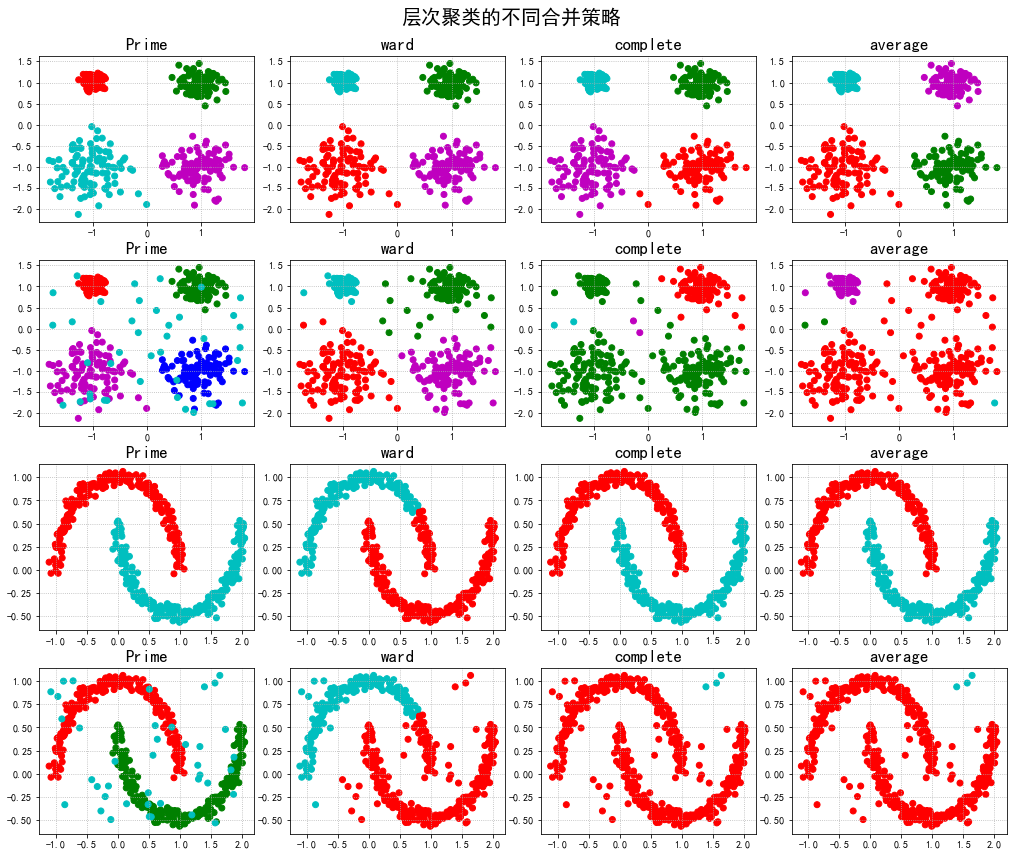

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import sklearn.datasets as ds
import warnings
%matplotlib inline
def extend(a, b):
    return 1.05*a-0.05*b, 1.05*b-0.05*a

warnings.filterwarnings(action='ignore', category=UserWarning)
np.set_printoptions(suppress=True)
np.random.seed(0)
n_clusters = 4
N = 400
data1, y1 = ds.make_blobs(n_samples=N, n_features=2, centers=((-1, 1), (1, 1), (1, -1), (-1, -1)),
                          cluster_std=(0.1, 0.2, 0.3, 0.4), random_state=0)
data1 = np.array(data1)
n_noise = int(0.1*N)
r = np.random.rand(n_noise, 2)
data_min1, data_min2 = np.min(data1, axis=0)
data_max1, data_max2 = np.max(data1, axis=0)
r[:, 0] = r[:, 0] * (data_max1-data_min1) + data_min1
r[:, 1] = r[:, 1] * (data_max2-data_min2) + data_min2
data1_noise = np.concatenate((data1, r), axis=0)
y1_noise = np.concatenate((y1, [4]*n_noise))

data2, y2 = ds.make_moons(n_samples=N, noise=.05)
data2 = np.array(data2)
n_noise = int(0.1 * N)
r = np.random.rand(n_noise, 2)
data_min1, data_min2 = np.min(data2, axis=0)
data_max1, data_max2 = np.max(data2, axis=0)
r[:, 0] = r[:, 0] * (data_max1 - data_min1) + data_min1
r[:, 1] = r[:, 1] * (data_max2 - data_min2) + data_min2
data2_noise = np.concatenate((data2, r), axis=0)
y2_noise = np.concatenate((y2, [3] * n_noise))

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

cm = mpl.colors.ListedColormap(['r', 'g', 'b', 'm', 'c'])
plt.figure(figsize=(14, 12), facecolor='w')
plt.cla()
linkages = ("ward", "complete", "average")
for index, (n_clusters, data, y) in enumerate(((4, data1, y1), (4, data1_noise, y1_noise),
                                               (2, data2, y2), (2, data2_noise, y2_noise))):
    plt.subplot(4, 4, 4*index+1)
    plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
    plt.title('Prime', fontsize=17)
    plt.grid(b=True, ls=':')
    data_min1, data_min2 = np.min(data, axis=0)
    data_max1, data_max2 = np.max(data, axis=0)
    plt.xlim(extend(data_min1, data_max1))
    plt.ylim(extend(data_min2, data_max2))

    connectivity = kneighbors_graph(data, n_neighbors=7, mode='distance', metric='minkowski', p=2, include_self=True)
    connectivity = 0.5 * (connectivity + connectivity.T)
    for i, linkage in enumerate(linkages):
        ac = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                     connectivity=connectivity, linkage=linkage)
        ac.fit(data)
        y = ac.labels_
        plt.subplot(4, 4, i+2+4*index)
        plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
        plt.title(linkage, fontsize=17)
        plt.grid(b=True, ls=':')
        plt.xlim(extend(data_min1, data_max1))
        plt.ylim(extend(data_min2, data_max2))
plt.suptitle(u'层次聚类的不同合并策略', fontsize=20)
plt.tight_layout(0.5, rect=(0, 0, 1, 0.95))

# 3.KMeans聚类法与KMeans++聚类法
## 3.1.步骤
- 随机选择K个点作为初始质心
- 把每个点按照距离分配给最近的质心，形成K个簇
- 重新计算每个簇的质心
- 重复2、3步，直到质心不在变化

## 3.2.选择质心
KMeans聚类法选择质心，是随机从样本中取出K个样本，作为质心，但是这样的话不科学，KMeans++改善了获取质心的方法，其余步骤跟KMeans一样。KMeans++获取质心是这样做的：
1. 首先，随机从样本中选取一个记录作为第一个质心
2. 获取第二个质心这样做，计算出样本中每个点到第一个质心的距离
3. 形成一个权重数组，然后给这个数组求和，然后将这个数组的每个元素除以这个和，然后放入这个数组
4. 生成一个0-1之间的随机数，然后从权重数组的第一个元素开始相加，直到相加的和大于这个随机数时停止，获取循环的次数N，选取第N-1个节点，作为第二个质心
5. 获取后面的质心，计算出每个样本节点到已经选出的每一个质心的距离，然后取最小的距离，然后从夫3，4两个步骤

## 3.3.形成K簇
无论KMeans还是KMeans++，这个时候都已经选择了K个质心，也就是中心点，接着的步骤就一样了。产生一个数组，然后计算每个样本节点离这K个质心的最近距离，这样可以将每个样本划入不同的以质心为中点的簇中.如果新找到的簇，与原来所属的簇不一致，对定义一个变量加1，当这个值大于0的时候，说明我们有太多的节点进行了调整，那么需要做3.2这一步，否则，说明我们的点都划入了适当的簇中，可以退出程序了

## 3.4.更新每个簇的质心
1. 生成一个数组，统计出每个质心的簇里面节点的个数
2. 生成一个数组，将每个簇中的所有点的坐标值，对应相加 ，比如K1有3个节点，每个节点有$\[a_1,a_2,a_3,a_4]$四个坐标，那么需要将每个节点的a1坐标相加，然后放在数组.第一个元素的第一个位置，每个节点的a2坐标相加，放在数组第一个元素的第二个位置，一次类推。对于K2一样，这个数组是一个K行4列的二维数组
3. 接着，将这K行记录中，每行的每一个元素，除以对应的第一个数组的值，放入相应的位置
4. 这个数组就是更新后的K个质心

## 3.5.公式化解释
记K个簇中心为$\mu_1,\mu_2,...,\mu_k$，则每个簇的样本数目为$N_1,N_2,...,N_k$，使用平方误差作为目标函数，有
$$J(\mu_1,\mu_2,...,\mu_k)=\frac{1}{2}\sum_{j=1}^K\sum_{i=1}^{N_j}(x_i-\mu_j)^2$$
对于$\mu_1,\mu_2,...,\mu_k$的函数求偏导，其驻点为
$$\frac{\partial{J}}{\partial{\mu_j}}=-\sum_{i=1}^{N_j}(x_i-\mu_j)=0 \Rightarrow \mu_j=\frac{1}{N}\sum_{i=1}^{N_j}x_i$$

## 3.6.优缺点
### 3.6.1.优点
- 解决聚类问题的一种经典方法，简单、快速
- 当处理大数据集的时候，该算法保持可伸缩性和高效率
- 当簇近似为高斯分布时，它的效果较好

### 3.6.2.缺点
- 在簇的平均值可被定义的情况下才能使用，可能不适用于某些应用
- 必须事先给出K(要生成的簇的数目)，而且对初值敏感，对于不同的初始值，可能会导致不同的结果
- 不适合于发现非凸形状的簇或者大小差别很大的簇
- 对噪声和孤立点的数据敏感